In [1]:
import keras
keras.__version__

/root/anaconda3/envs/tf1.4_gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/root/anaconda3/envs/tf1.4_gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.0.8'

In [3]:
!ls -al gdrive/dataset/traffic-signs-data-gtsrb/

total 155873
-rw------- 1 root root  38888118 Apr  2 04:14 test.p
-rw------- 1 root root 107146452 Apr  2 04:14 train.p
-rw------- 1 root root  13578712 Apr  2 04:14 valid.p


In [2]:
data_dir = "/data2/traffic-signs-data-gtsrb/"

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = data_dir+'train.p'
validation_file= data_dir+'valid.p'
testing_file = data_dir+'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# shuffle data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [5]:
# print the shape of data
print('X_train: ', X_train.shape, '. y_train: ', y_train.shape)
print('X_valid: ', X_valid.shape, '. y_valid: ', y_valid.shape)
print('X_test: ', X_test.shape, '. y_test: ', y_test.shape)

X_train:  (34799, 32, 32, 3) . y_train:  (34799,)
X_valid:  (4410, 32, 32, 3) . y_valid:  (4410,)
X_test:  (12630, 32, 32, 3) . y_test:  (12630,)


In [6]:
y_train[:3]

array([25,  9,  1], dtype=uint8)

In [6]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False # to disable grid output

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
#image_shape = (X_train.shape[1], X_train.shape[2])
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


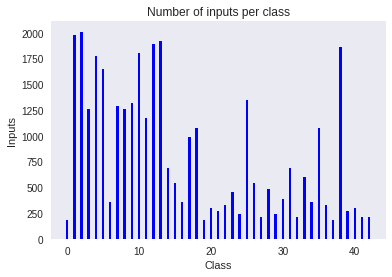

Class:  0


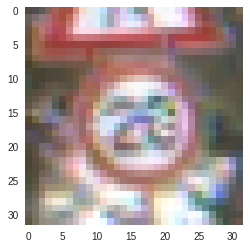

Class:  1


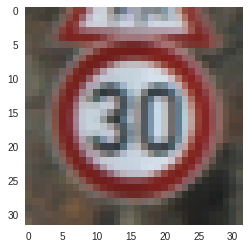

Class:  2


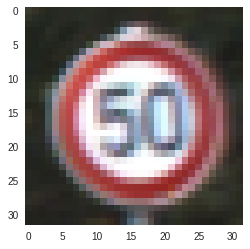

Class:  3


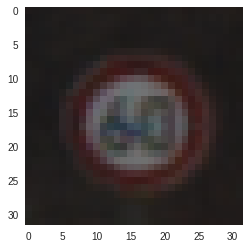

Class:  4


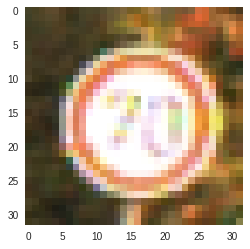

Class:  5


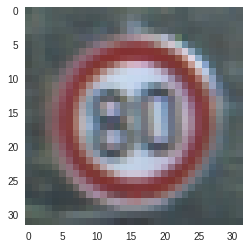

Class:  6


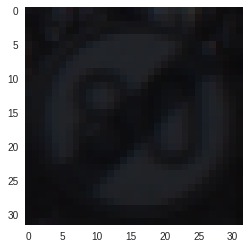

Class:  7


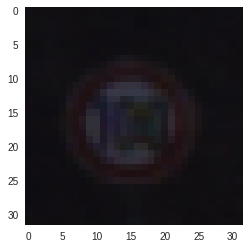

Class:  8


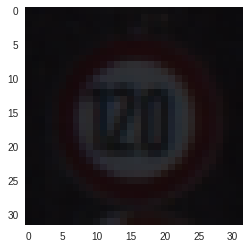

Class:  9


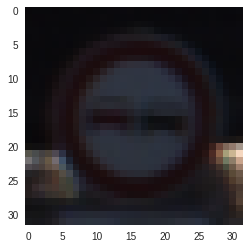

Class:  10


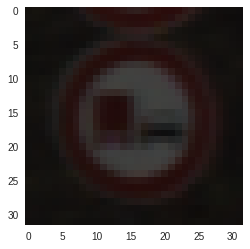

Class:  11


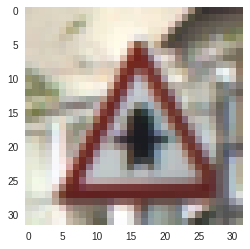

Class:  12


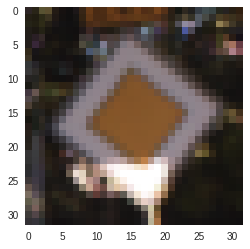

Class:  13


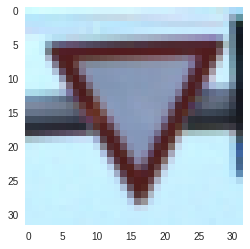

Class:  14


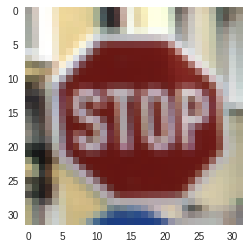

Class:  15


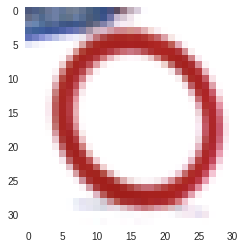

Class:  16


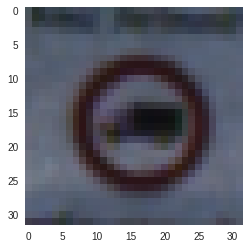

Class:  17


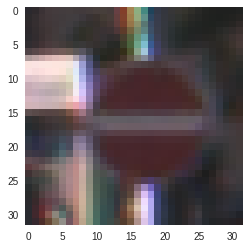

Class:  18


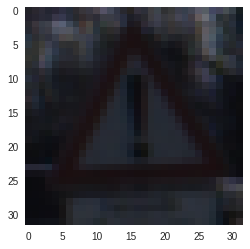

Class:  19


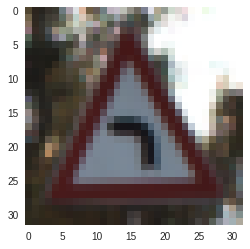

Class:  20


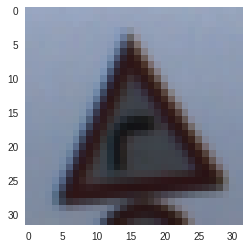

Class:  21


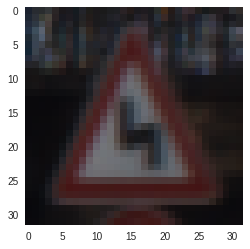

Class:  22


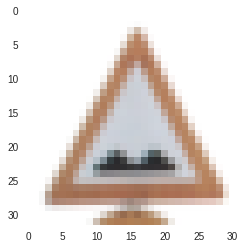

Class:  23


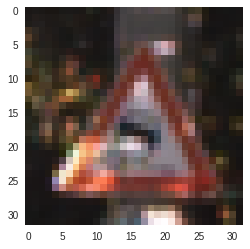

Class:  24


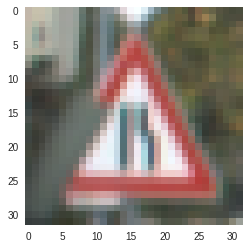

Class:  25


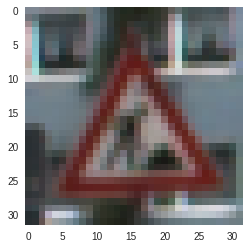

Class:  26


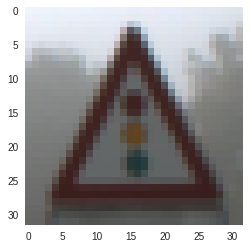

Class:  27


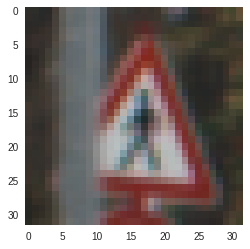

Class:  28


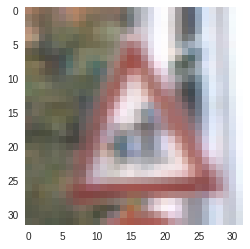

Class:  29


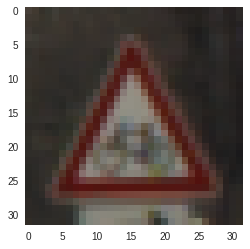

Class:  30


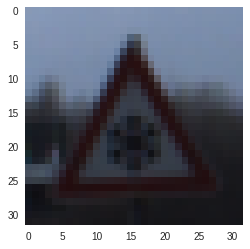

Class:  31


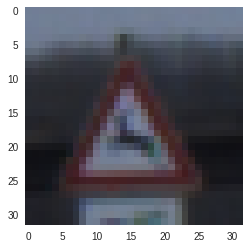

Class:  32


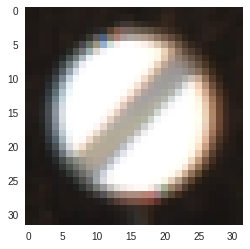

Class:  33


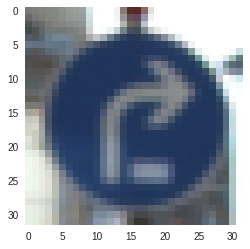

Class:  34


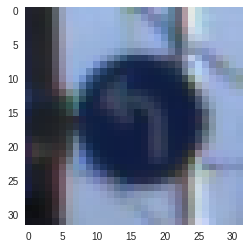

Class:  35


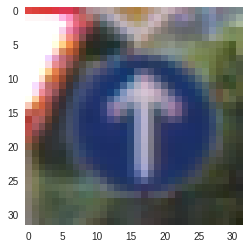

Class:  36


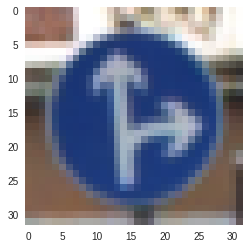

Class:  37


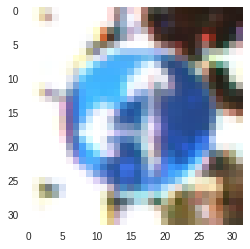

Class:  38


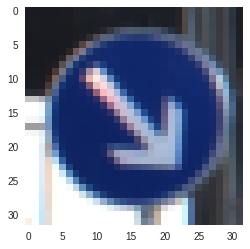

Class:  39


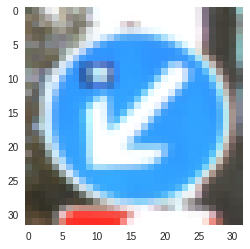

Class:  40


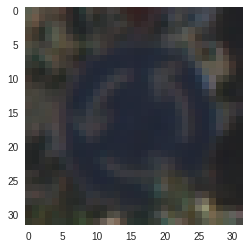

Class:  41


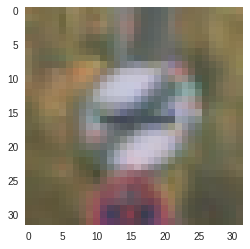

Class:  42


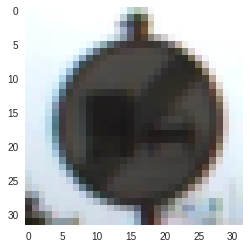

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

inputs_per_class = np.bincount(y_train)
max_inputs = np.max(inputs_per_class)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()

for i in range(n_classes):
    for j in range(len(y_train)):
        if (i == y_train[j]):
            print('Class: ', i)
            plt.imshow(X_train[j])
            plt.show()
            break

In [8]:
# normalize the data to have zero mean and equal variance using cv2.normalize()

X_train_norm = []

for i, image in enumerate(X_train):
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train_norm.append(norm_image)

In [9]:
X_valid_norm = []

for i, image in enumerate(X_valid):
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_valid_norm.append(norm_image)

In [10]:
X_test_norm = []

for i, image in enumerate(X_test):
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_test_norm.append(norm_image)

In [11]:
X_train_norm = np.asarray(X_train_norm)
X_valid_norm = np.asarray(X_valid_norm)
X_test_norm = np.asarray(X_test_norm)

Text(0.5,1,'Normalized Image')

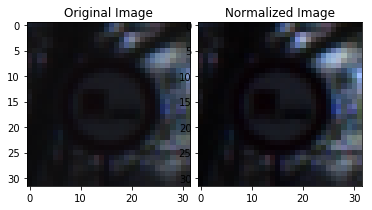

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(X_train[0])
ax1.set_title('Original Image')
ax2.imshow(X_train_norm[0])
ax2.set_title('Normalized Image')

In [13]:
from keras import layers
from keras import models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu',  # 1st stage
                        input_shape=(32, 32, 3))) # original input image is "‪499 x 375‬ x 3"
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))  # 2nd stage
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [15]:
"""
model0 = models.Sequential()
model0.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu',  # 1st stage
                        input_shape=(32, 32, 3))) # original input image is "‪499 x 375‬ x 3"
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Conv2D(16, (5, 5), activation='relu'))  # 2nd stage
model0.add(layers.MaxPooling2D((2, 2)))
model0.add(layers.Flatten())
model0.add(layers.Dropout(0.5))
model0.add(layers.Dense(120, activation='relu'))
model0.add(layers.Dense(84, activation='relu'))
model0.add(layers.Dense(43, activation='softmax'))
"""
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['acc'])

In [16]:
# Convert labels to categorical one-hot encoding
one_hot_y_train = keras.utils.to_categorical(y_train, num_classes=43)
one_hot_y_valid = keras.utils.to_categorical(y_valid, num_classes=43)
one_hot_y_test = keras.utils.to_categorical(y_test, num_classes=43)

In [17]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train_norm, one_hot_y_train,
          batch_size=128, epochs=100,
          validation_data=(X_valid_norm, one_hot_y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 8s - loss: 2.0396 - acc: 0.4404 - val_loss: 0.8135 - val_acc: 0.7590
Epoch 2/100
34799/34799 [==============================] - 1s - loss: 0.6665 - acc: 0.7899 - val_loss: 0.4790 - val_acc: 0.8531
Epoch 3/100
34799/34799 [==============================] - 1s - loss: 0.4505 - acc: 0.8586 - val_loss: 0.3998 - val_acc: 0.8810
Epoch 4/100
34799/34799 [==============================] - 1s - loss: 0.3516 - acc: 0.8895 - val_loss: 0.3680 - val_acc: 0.8873
Epoch 5/100
34799/34799 [==============================] - 1s - loss: 0.2919 - acc: 0.9087 - val_loss: 0.2918 - val_acc: 0.9143
Epoch 6/100
34799/34799 [==============================] - 1s - loss: 0.2453 - acc: 0.9233 - val_loss: 0.2688 - val_acc: 0.9193
Epoch 7/100
34799/34799 [==============================] - 1s - loss: 0.2268 - acc: 0.9289 - val_loss: 0.2743 - val_acc: 0.9231
Epoch 8/100
34799/34799 [==============================

34799/34799 [==============================] - 1s - loss: 0.0499 - acc: 0.9838 - val_loss: 0.1714 - val_acc: 0.9649
Epoch 65/100
34799/34799 [==============================] - 1s - loss: 0.0473 - acc: 0.9850 - val_loss: 0.2223 - val_acc: 0.9601
Epoch 66/100
34799/34799 [==============================] - 1s - loss: 0.0493 - acc: 0.9838 - val_loss: 0.1470 - val_acc: 0.9678
Epoch 67/100
34799/34799 [==============================] - 1s - loss: 0.0475 - acc: 0.9847 - val_loss: 0.1780 - val_acc: 0.9637
Epoch 68/100
34799/34799 [==============================] - 1s - loss: 0.0480 - acc: 0.9841 - val_loss: 0.1483 - val_acc: 0.9694
Epoch 69/100
34799/34799 [==============================] - 1s - loss: 0.0450 - acc: 0.9853 - val_loss: 0.1661 - val_acc: 0.9667
Epoch 70/100
34799/34799 [==============================] - 1s - loss: 0.0467 - acc: 0.9847 - val_loss: 0.1747 - val_acc: 0.9639
Epoch 71/100
34799/34799 [==============================] - 1s - loss: 0.0481 - acc: 0.9842 - val_loss: 0.2189

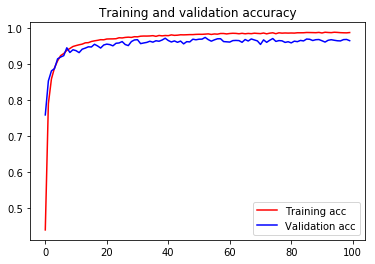

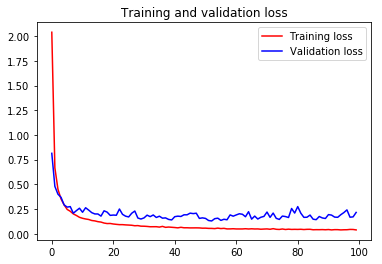

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc'] # len(acc)=30, due to epoch = 30
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Perform testing
test_loss, test_acc = model.evaluate(X_test_norm, one_hot_y_test)

11872/12630 [===========================>..] - ETA: 0s

In [27]:
test_loss, test_acc # test_acc is 94.35%

(0.23592129931183273, 0.9551068883327294)

In [21]:
model.save('./traffic_sign_e100.h5')

In [24]:
from keras.models import load_model
model = load_model('./traffic_sign_e100.h5')

In [22]:
del model

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
__________

In [36]:
??model.save

Object `model.save` not found.


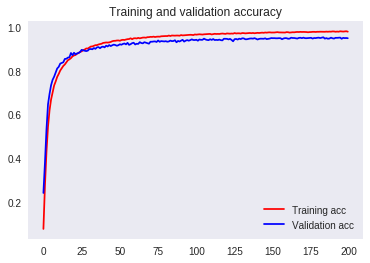

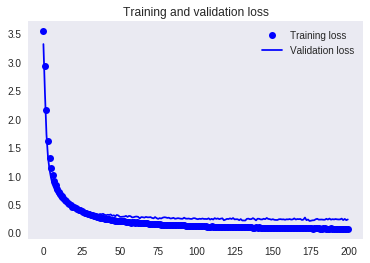

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc'] # len(acc)=30, due to epoch = 30
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Prediction on new image
#img_path = 'gdrive/colab_models/test_photo_32x32/no_entry.jpg'
#img_path = 'gdrive/colab_models/test_photo_32x32/forward.jpg'
#img_path = 'gdrive/colab_models/test_photo_32x32/no.jpg'
img_path = 'gdrive/colab_models/test_photo_32x32/no_pedestrian.jpg'

In [0]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img) # shape will be (150,150,3)
img_tensor = np.expand_dims(img_tensor, axis=0) # shape will be (1,150,150,3)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255. # scale to [0..1] in float32 type

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
output_pred = model.predict(img_tensor)
print(np.max(output_pred))
print(np.argmax(output_pred))

(1, 32, 32, 3)
0.9707343
27
